<a href="https://colab.research.google.com/github/Jamess200/MyBirdNetTest/blob/main/Time_Test_BN_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [4]:
import os

# Define path in Google Drive where you want to clone the repository
repo_path = '/content/drive/MyDrive/'

# Check if directory already exists
if not os.path.exists(repo_path):
    os.makedirs(repo_path)

# Change working directory to defined path
os.chdir(repo_path)

# Clone the repository if doesnt exist, otherwise pull latest changes
if not os.path.exists(os.path.join(repo_path, 'MyBirdNetTest')):
    !git clone https://github.com/Jamess200/MyBirdNetTest.git
else:
    os.chdir('MyBirdNetTest')
    !git pull

# Verify cloned repository
!ls

remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 9 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), 290.53 KiB | 319.00 KiB/s, done.
From https://github.com/Jamess200/MyBirdNetTest
   a8fbb7a..a264e6b  main       -> origin/main
Updating e310bf8..a264e6b
error: The following untracked working tree files would be overwritten by merge:
	data/CSV_data/BirdNET_results7.csv
	data/CSV_data/BirdNET_results8.csv
	data/CSV_data/combined.csv
Please move or remove them before you merge.
Aborting
data			 img		       json_to_csv_converter.ipynb  Time_Test_BN_Test.ipynb
Density_plot_code.ipynb  Inital_BN_Test.ipynb  README.md


In [3]:
!pip3 install birdnetlib
!pip3 install tflite-runtime
!pip3 install resampy
!pip3 install ffmpeg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=8ba9cf54ff2198b62f2f4de99b58faa3f1766aa05ee3f62e3759cd8f2fad7543
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


In [5]:
import resampy
import birdnetlib
import tflite_runtime
import ffmpeg
import os
import random
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from birdnetlib import Recording
from birdnetlib.analyzer import Analyzer
from datetime import datetime
from scipy.stats import f_oneway

In [7]:
# get data
base_dir = '/content/drive/MyDrive/HAUtrans/'

# Transect directories
transects = ['Trans5', 'Trans6', 'Trans7', 'Trans8']

In [ ]:
# Function to filter files past 5am and randomly select three
def select_files(transect):
    dir = os.path.join(base_dir, transect)
    print(f"Checking directory: {dir}")

    all_files = [f for f in os.listdir(dir) if os.path.isfile(os.path.join(dir, f))]
    print(f"All files in {transect}: {all_files}")

    # Filter files to include those past 5am
    filtered_files = [f for f in all_files if f.split('_')[-1].endswith('.wav') and int(f.split('_')[-1].split('.')[0]) > 50000]

    # Print filtered files
    print(f"Filtered files in {transect}: {filtered_files}")

    # Randomly select three files from filtered list
    selected_files = random.sample(filtered_files, 3)

    # Print selected files
    print(f"Selected files in {transect}: {selected_files}")

    return selected_files

In [ ]:
# Loop through each transect and select files
select_files_all = []
for transect in transects:
    selected_files = select_files(transect)
    select_files_all.extend(selected_files)

Checking directory: /content/drive/MyDrive/HAUtrans/Trans5
All files in Trans5: ['ED3_20240502_040000.wav', 'ED3_20240502_050000.wav', 'ED3_20240502_060000.wav', 'ED3_20240502_070000.wav', 'ED3_20240502_080000.wav', 'ED3_20240502_090000.wav', 'ED3_20240503_040000.wav', 'ED3_20240503_050000.wav', 'ED3_20240503_060000.wav', 'ED3_20240503_070000.wav', 'ED3_20240503_080000.wav', 'ED3_20240503_090000.wav', 'ED3_20240504_040000.wav', 'ED3_20240504_050000.wav', 'ED3_20240504_060000.wav', 'ED3_20240504_070000.wav', 'ED3_20240504_080000.wav', 'ED3_20240504_090000.wav', 'ED3_20240505_040000.wav', 'ED3_20240505_050000.wav', 'ED3_20240505_060000.wav', 'ED3_20240505_070000.wav', 'ED3_20240505_080000.wav', 'ED3_20240505_090000.wav', 'ED3_20240506_040000.wav', 'ED3_20240506_050000.wav', 'ED3_20240506_060000.wav', 'ED3_20240506_070000.wav', 'ED3_20240506_080000.wav', 'ED3_20240506_090000.wav', 'ED3_20240507_040000.wav', 'ED3_20240507_050000.wav', 'ED3_20240507_060000.wav', 'ED3_20240507_070000.wav', '

In [ ]:
print("All selected files from all transects:")
print(select_files_all)

All selected files from all transects:
['ED3_20240505_090000.wav', 'ED4_20240508_060000.wav', 'ED1_20240505_060000.wav', 'ED2_20240506_060000.wav']


In [ ]:
# This cell uses BirdNET-Analyzer to analyze multiple recordings.
# Load and initialize the BirdNET-Analyzer models.
analyzer = Analyzer()

testamp = [52.911,-2.4441] # near Market Drayton year=2024, month=4, day=20
recording_date = datetime(year=2024, month=5, day=5)

Labels loaded.
load model True
Model loaded.
Labels loaded.
load_species_list_model
Meta model loaded.


In [ ]:
# Create a dictionary to store the results
filtered_results  = {}

# Initialise a dictionary to store time taken for each file
time_taken = {file_name: [] for file_name in select_files_all}

In [ ]:
# Function to analyze a file and record time taken
def analyze_and_time(file_name):
    try:
        start_time = time.time()

        # Include the correct path to the data files
        for transect in transects:
            dir = os.path.join(base_dir, transect)
            file_path = os.path.join(dir, file_name)
            if os.path.exists(file_path):
                break

        recording = Recording(
            analyzer,
            file_path,  # path to the recording file
            lat=testamp[0],  # latitude of the recording location
            lon=testamp[1],  # longitude of the recording location
            date=recording_date,  # use the predefined date
            min_conf=0.25,
        )
        # Analyze the recording and store the result in the dictionary
        recording.analyze()
        filtered_results[file_name] = recording.detections

        end_time = time.time()
        duration = end_time - start_time
        time_taken[file_name].append(duration)
        print(f"Completed analysis for {file_name} in {duration} seconds")
    except Exception as e:
        print(f"Error processing {file_name}: {e}")

In [ ]:
# Run the analysis twice for each selected file
for _ in range(3):
    for file_name in select_files_all:
        analyze_and_time(file_name)

read_audio_data
read_audio_data: complete, read  600 chunks.
analyze_recording ED3_20240505_090000.wav
recording has lon/lat
set_predicted_species_list_from_position
return_predicted_species_list
17
138 species loaded.
Completed analysis for ED3_20240505_090000.wav in 134.20243406295776 seconds
read_audio_data
read_audio_data: complete, read  600 chunks.
analyze_recording ED4_20240508_060000.wav
recording has lon/lat
set_predicted_species_list_from_position
Completed analysis for ED4_20240508_060000.wav in 133.96542477607727 seconds
read_audio_data
read_audio_data: complete, read  600 chunks.
analyze_recording ED1_20240505_060000.wav
recording has lon/lat
set_predicted_species_list_from_position
Completed analysis for ED1_20240505_060000.wav in 133.2010498046875 seconds
read_audio_data
read_audio_data: complete, read  600 chunks.
analyze_recording ED2_20240506_060000.wav
recording has lon/lat
set_predicted_species_list_from_position
Completed analysis for ED2_20240506_060000.wav in 134

In [ ]:
# Print the time taken for each file
for file_name, times in time_taken.items():
    print(f"Time taken for {file_name}: {times}")

Time taken for ED3_20240505_090000.wav: [134.20243406295776, 131.3118667602539, 145.11748242378235]
Time taken for ED4_20240508_060000.wav: [133.96542477607727, 131.701429605484, 132.45288228988647]
Time taken for ED1_20240505_060000.wav: [133.2010498046875, 131.9317605495453, 134.0025405883789]
Time taken for ED2_20240506_060000.wav: [134.88495683670044, 152.09776711463928, 131.87685227394104]


In [8]:
# Define the time_taken dictionary from 4x3x3
time_taken = {
    'ED3_20240504_060000.wav': [148.26567888259888, 131.3175413608551, 131.81006503105164],
    'ED3_20240507_060000.wav': [135.44273924827576, 132.589524269104, 130.95629000663757],
    'ED3_20240507_080000.wav': [132.7655291557312, 130.96111297607422, 132.50833368301392],
    'ED4_20240506_080000.wav': [134.55523228645325, 131.93665766716003, 131.01889991760254],
    'ED4_20240507_070000.wav': [133.07267451286316, 131.65339422225952, 130.59835863113403],
    'ED4_20240509_090000.wav': [136.04011631011963, 130.6758518218994, 132.39158415794373],
    'ED1_20240504_080000.wav': [132.42154240608215, 132.48319792747498, 130.7896022796631],
    'ED1_20240502_060000.wav': [134.03174543380737, 131.08203983306885, 131.17507648468018],
    'ED1_20240509_060000.wav': [133.2044644355774, 130.86867833137512, 131.52107191085815],
    'ED2_20240506_080000.wav': [134.92906951904297, 132.47607445716858, 130.89053201675415],
    'ED2_20240507_060000.wav': [133.40657448768616, 130.94219160079956, 132.01655673980713],
    'ED2_20240502_060000.wav': [134.09416151046753, 131.09309935569763, 131.28739380836487]
}

In [9]:
# Define the time_taken_2 dictionary from 4x1x3
time_taken_2 = {
    'ED3_20240505_090000.wav': [134.20243406295776, 131.3118667602539, 145.11748242378235],
    'ED4_20240508_060000.wav': [133.96542477607727, 131.701429605484, 132.45288228988647],
    'ED1_20240505_060000.wav': [133.2010498046875, 131.9317605495453, 134.0025405883789],
    'ED2_20240506_060000.wav': [134.88495683670044, 152.09776711463928, 131.87685227394104]
}

Timing data saved to /content/drive/MyDrive/timing_data.csv
                  file_name  run        time
0   ED3_20240504_060000.wav    1  148.265679
1   ED3_20240504_060000.wav    2  131.317541
2   ED3_20240504_060000.wav    3  131.810065
3   ED3_20240507_060000.wav    1  135.442739
4   ED3_20240507_060000.wav    2  132.589524
5   ED3_20240507_060000.wav    3  130.956290
6   ED3_20240507_080000.wav    1  132.765529
7   ED3_20240507_080000.wav    2  130.961113
8   ED3_20240507_080000.wav    3  132.508334
9   ED4_20240506_080000.wav    1  134.555232
10  ED4_20240506_080000.wav    2  131.936658
11  ED4_20240506_080000.wav    3  131.018900
12  ED4_20240507_070000.wav    1  133.072675
13  ED4_20240507_070000.wav    2  131.653394
14  ED4_20240507_070000.wav    3  130.598359
15  ED4_20240509_090000.wav    1  136.040116
16  ED4_20240509_090000.wav    2  130.675852
17  ED4_20240509_090000.wav    3  132.391584
18  ED1_20240504_080000.wav    1  132.421542
19  ED1_20240504_080000.wav    2  132.48

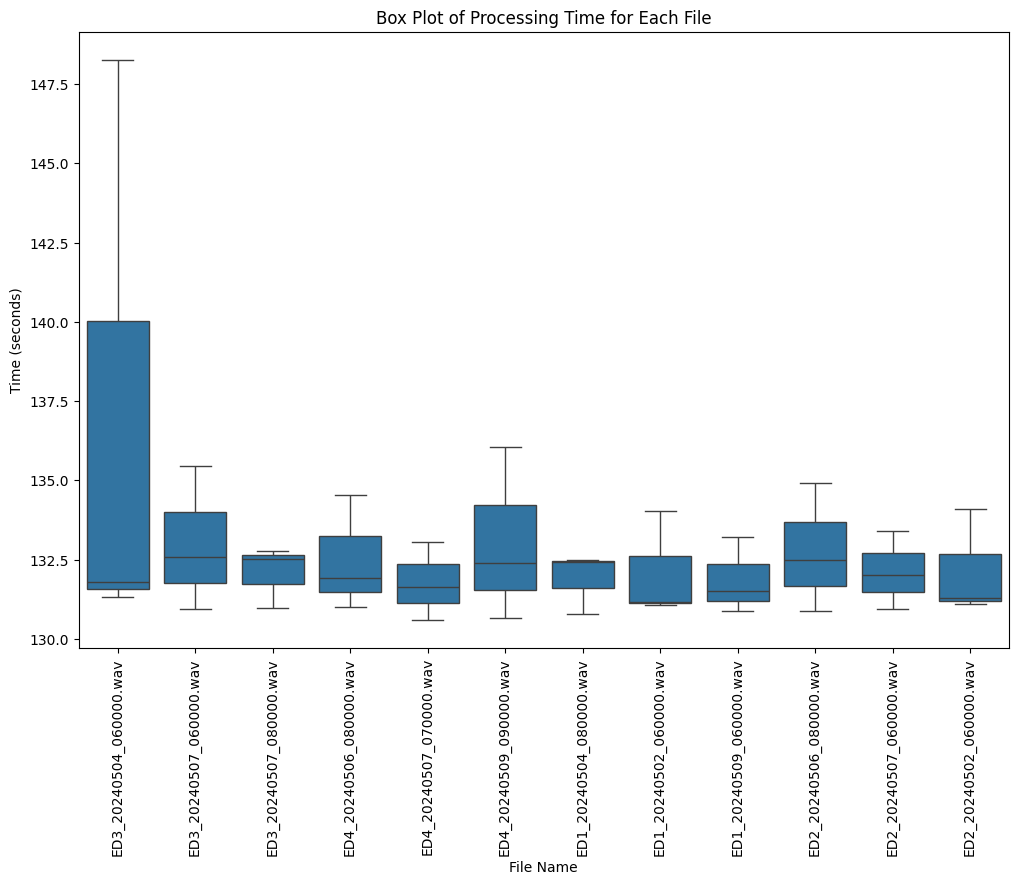

ANOVA results: F-statistic = 0.6128672382387197, p-value = 0.7999044174905225
There is no significant difference in the time taken between different files.


In [10]:
# Convert time_taken dictionary into list of dictionaries
data = []
for file_name, times in time_taken.items():
    for i, time_value in enumerate(times):
        data.append({'file_name': file_name, 'run': i + 1, 'time': time_value})

# Create DataFrame from list of dictionaries
df = pd.DataFrame(data)

# Save to CSV
csv_path = '/content/drive/MyDrive/timing_data.csv'
df.to_csv(csv_path, index=False)
print(f"Timing data saved to {csv_path}")

# Load timing data from CSV file
df = pd.read_csv(csv_path)
print(df)

# Create Box Plots
plt.figure(figsize=(12, 8))
sns.boxplot(x='file_name', y='time', data=df)
plt.xticks(rotation=90)
plt.title('Box Plot of Processing Time for Each File')
plt.xlabel('File Name')
plt.ylabel('Time (seconds)')
plt.show()

# ANOVA
# Group the times by file_name
grouped_times = [df[df['file_name'] == file_name]['time'].values for file_name in df['file_name'].unique()]

# One-way ANOVA
f_stat, p_value = f_oneway(*grouped_times)

print(f"ANOVA results: F-statistic = {f_stat}, p-value = {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in the time taken between different files.")
else:
    print("There is no significant difference in the time taken between different files.")


Timing data saved to /content/drive/MyDrive/timing_data_2.csv
                  file_name  run        time
0   ED3_20240505_090000.wav    1  134.202434
1   ED3_20240505_090000.wav    2  131.311867
2   ED3_20240505_090000.wav    3  145.117482
3   ED4_20240508_060000.wav    1  133.965425
4   ED4_20240508_060000.wav    2  131.701430
5   ED4_20240508_060000.wav    3  132.452882
6   ED1_20240505_060000.wav    1  133.201050
7   ED1_20240505_060000.wav    2  131.931761
8   ED1_20240505_060000.wav    3  134.002541
9   ED2_20240506_060000.wav    1  134.884957
10  ED2_20240506_060000.wav    2  152.097767
11  ED2_20240506_060000.wav    3  131.876852


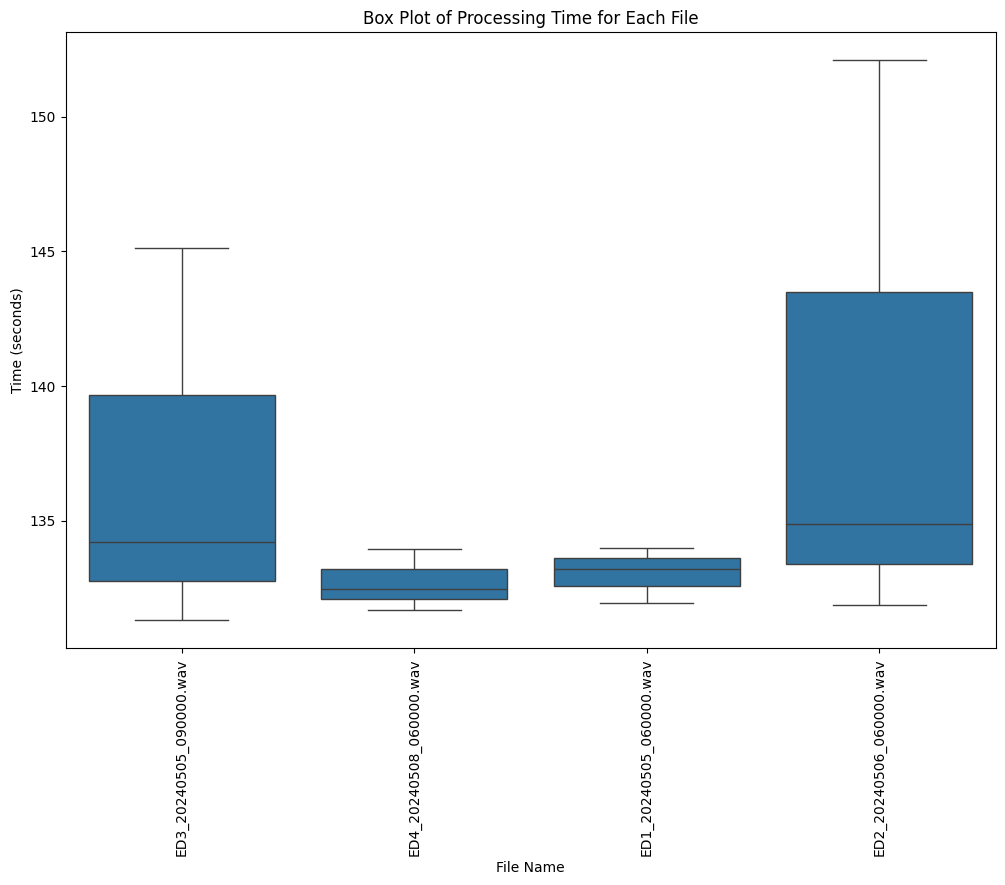

ANOVA results: F-statistic = 0.7493357922670073, p-value = 0.552649714514654
There is no significant difference in the time taken between different files.


In [12]:
# Convert time_taken_2 dictionary into list of dictionaries
data = []
for file_name, times in time_taken_2.items():
    for i, time_value in enumerate(times):
        data.append({'file_name': file_name, 'run': i + 1, 'time': time_value})

# Create DataFrame from list of dictionaries
df = pd.DataFrame(data)

# Save to CSV
csv_path2 = '/content/drive/MyDrive/timing_data_2.csv'
df.to_csv(csv_path2, index=False)
print(f"Timing data saved to {csv_path2}")

# Load timing data from CSV file
df = pd.read_csv(csv_path2)
print(df)

# Create Box Plots
plt.figure(figsize=(12, 8))
sns.boxplot(x='file_name', y='time', data=df)
plt.xticks(rotation=90)
plt.title('Box Plot of Processing Time for Each File')
plt.xlabel('File Name')
plt.ylabel('Time (seconds)')
plt.show()

# ANOVA
# Group the times by file_name
grouped_times = [df[df['file_name'] == file_name]['time'].values for file_name in df['file_name'].unique()]

# One-way ANOVA
f_stat, p_value = f_oneway(*grouped_times)

print(f"ANOVA results: F-statistic = {f_stat}, p-value = {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in the time taken between different files.")
else:
    print("There is no significant difference in the time taken between different files.")
